**Question to be answered:**
How has each of the different modes of public transport increased or decreased in usage?

In [2]:
# Dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import datetime
import matplotlib.dates as mdates

# Load CSV
monthly_pt = os.path.join("..", "Datasets", "Monthly public transport patronage by Mode.csv")
covid_cases = os.path.join("..", "Datasets", "NCOV_cases_by_postcode_LGA.csv")

# Read and display with pandas
covid_cases_df = pd.read_csv(covid_cases)
monthly_pt_df = pd.read_csv(monthly_pt)
monthly_pt_df.head()

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Regional train,Regional coach,Regional bus
0,2018,1,January,16809932.0,15231368.0,7568547.0,1466256,116568,721229.0
1,2018,2,February,19554477.0,16980925.0,10487311.0,1522981,103197,1118494.0
2,2018,3,March,22659010.0,19832126.0,11528895.0,1809774,117180,1224816.0
3,2018,4,April,20312040.0,16919872.0,9592750.0,1684827,107480,946218.0
4,2018,5,May,22768447.0,17691427.0,11263486.0,1790656,109456,1258704.0


In [3]:
# Create dataframe to then collate the dates into one column to be used as x-axis values on main df
monthly_time = pd.DataFrame({"Year":monthly_pt_df["Year"], "Month":monthly_pt_df["Month"]})
monthly_time["Day"] = 1
monthly_pt_df["Date"] = pd.to_datetime(monthly_time)

# For x-axis labels, use a concatenation of Year and Month Name to make it easier to read
monthly_pt_df["Period"] = monthly_pt_df["Year"].astype(str) + "-" + monthly_pt_df["Month name"]

# Change values to numeric
monthly_pt_df["Metropolitan train"] = pd.to_numeric(monthly_pt_df["Metropolitan train"])
monthly_pt_df["Metropolitan tram"] = pd.to_numeric(monthly_pt_df["Metropolitan tram"])
monthly_pt_df["Metropolitan bus"] = pd.to_numeric(monthly_pt_df["Metropolitan bus"])

# Convert as types to integers as this is total amount of tap ons and shouldn't require decimal places
monthly_pt_df = monthly_pt_df.astype({"Metropolitan train": "int64",
                                      "Metropolitan tram": "int64",
                                      "Metropolitan bus": "int64"})

# Filter the dataset to the timeframe we are covering as well as removing the unnecessary columns and resetting the index after dropping values
monthly_pt_df.drop(monthly_pt_df[(monthly_pt_df["Year"] == 2018) & (monthly_pt_df["Month"] <= 5)].index, inplace=True)
monthly_pt_df.drop(monthly_pt_df[(monthly_pt_df["Year"] == 2022) & (monthly_pt_df["Month"] >= 7)].index, inplace=True)
monthly_pt_df = monthly_pt_df.reset_index()
monthly_pt_df.drop(['index', 'Regional train', 'Regional coach', 'Regional bus'],axis=1,inplace=True)

monthly_pt_df.head()

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Date,Period
0,2018,6,June,19284755,15836171,9526795,2018-06-01,2018-June
1,2018,7,July,20732099,17169239,9657327,2018-07-01,2018-July
2,2018,8,August,22566766,18415592,11756706,2018-08-01,2018-August
3,2018,9,September,20056487,15892774,9878596,2018-09-01,2018-September
4,2018,10,October,22299761,18677490,11233979,2018-10-01,2018-October


In [4]:
covid_cases_df.head()

,diagnosis_date,postcode,lga_name,lga_code,RAT_case_count,PCR_case_count,Total_case_count
0,2020-01-25,3149,Monash (C),24970,0,1,1
1,2020-01-28,3150,Monash (C),24970,0,1,1
2,2020-01-30,3006,Melbourne (C),24600,0,1,1
3,2020-01-31,3008,Melbourne (C),24600,0,1,1
4,2020-02-22,3058,Merri-bek (C),25250,0,1,1


In [5]:
# Clean Covid cases df
covid_cases_df = covid_cases_df.rename(columns={"diagnosis_date":"Date", "Total_case_count":"New Covid Cases"})
covid_cases_df["Date"] = pd.to_datetime(covid_cases_df["Date"])

# Group the suburbs by date and summing the new covid cases column across all the suburbs in Vic
covid_cases_df = pd.DataFrame(covid_cases_df.groupby("Date")["New Covid Cases"].sum())

# Filter the dataset to the timeframe we are covering as well as resetting the index after dropping values
covid_cases_df.drop(covid_cases_df[covid_cases_df.index > "2022-06-01"].index, inplace=True)
covid_cases_df = covid_cases_df.reset_index()
covid_cases_df.head()

,Date,New Covid Cases
0,2020-01-25,1
1,2020-01-28,1
2,2020-01-30,1
3,2020-01-31,1
4,2020-02-22,2


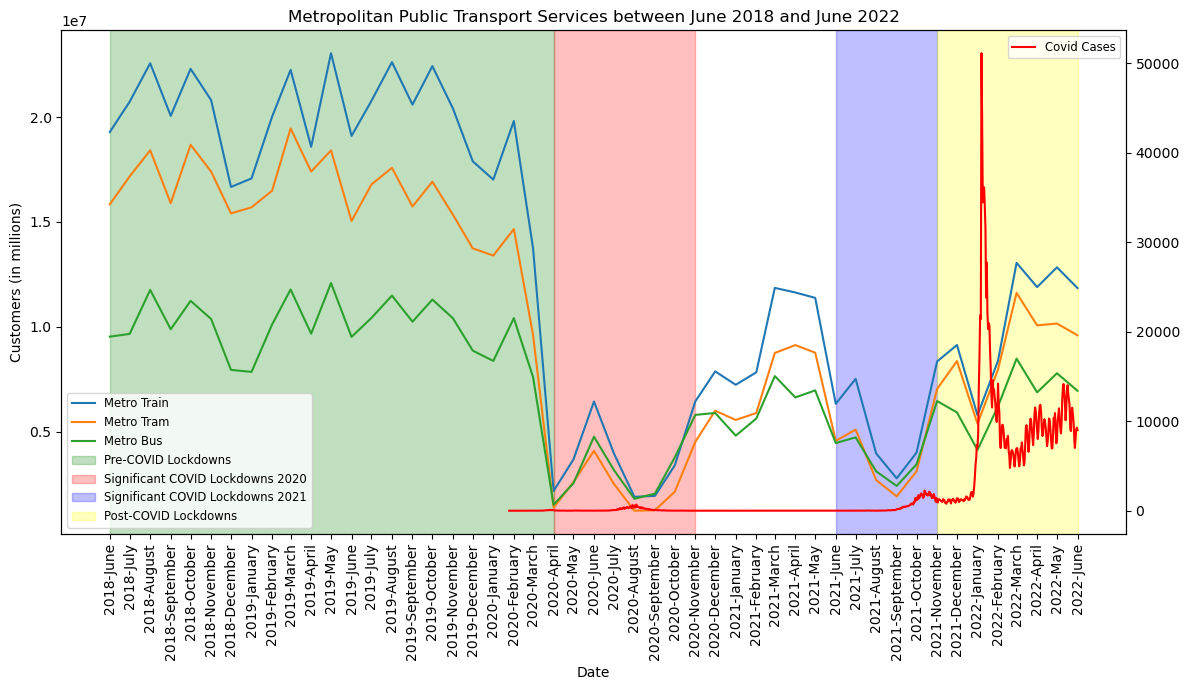

In [6]:
# Create variables to plot
xvalues = monthly_pt_df["Date"]
mtrain = monthly_pt_df["Metropolitan train"]
mtram = monthly_pt_df["Metropolitan tram"]
mbus = monthly_pt_df["Metropolitan bus"]
date = covid_cases_df["Date"]
new_cases = covid_cases_df["New Covid Cases"]

# Plot 3 lines using the same x values and y values
plt.figure(figsize=(12,7))
plt.plot(xvalues,mtrain,label="Metro Train")
plt.plot(xvalues,mtram,label="Metro Tram")
plt.plot(xvalues,mbus,label="Metro Bus")
plt.title("Metropolitan Public Transport Services between June 2018 and June 2022")
plt.axvspan("2018-06-01", "2020-04-01", alpha=0.25, color='green', label="Pre-COVID Lockdowns")
plt.axvspan("2020-04-01", "2020-11-01", alpha=0.25, color='red', label="Significant COVID Lockdowns 2020")
plt.axvspan("2021-06-01", "2021-11-01", alpha=0.25, color='blue', label="Significant COVID Lockdowns 2021")
plt.axvspan("2021-11-01", "2022-06-01", alpha=0.25, color='yellow', label="Post-COVID Lockdowns")
plt.xlabel("Date")
plt.ylabel("Customers (in millions)")
plt.xticks(ticks = xvalues, labels = monthly_pt_df["Period"],rotation=90)
plt.legend(loc="best", fontsize="small",fancybox=True)

# Add a 4th line that uses similar formatted x values, but different y values
plt2 = plt.twinx()
plt2.plot(date,new_cases,label="Covid Cases",color="red")
plt2.legend(loc="best", fontsize="small",fancybox=True)
plt.tight_layout()

# Save and show the visualisation
plt.savefig("../Visualisations/Q2-1.jpg")
plt.show()


In [7]:
# Create a month counter to easily establish before and after points for the Covid timeline
monthly_pt_df["Month Counter"] = 1
for i in range(1, len(monthly_pt_df)):
     monthly_pt_df.loc[i, 'Month Counter'] = monthly_pt_df.loc[i-1, 'Month Counter'] + 1

monthly_pt_df.head()

,Year,Month,Month name,Metropolitan train,Metropolitan tram,Metropolitan bus,Date,Period,Month Counter
0,2018,6,June,19284755,15836171,9526795,2018-06-01,2018-June,1
1,2018,7,July,20732099,17169239,9657327,2018-07-01,2018-July,2
2,2018,8,August,22566766,18415592,11756706,2018-08-01,2018-August,3
3,2018,9,September,20056487,15892774,9878596,2018-09-01,2018-September,4
4,2018,10,October,22299761,18677490,11233979,2018-10-01,2018-October,5


In [8]:
# Group all data to pre covid, mid covid and post covid
pre_mtrain = monthly_pt_df.loc[monthly_pt_df["Month Counter"] < 23,["Metropolitan train"]].sum()
pre_mtram = monthly_pt_df.loc[monthly_pt_df["Month Counter"] < 23,["Metropolitan tram"]].sum()
pre_mbus = monthly_pt_df.loc[monthly_pt_df["Month Counter"] < 23,["Metropolitan bus"]].sum()

mid_mtrain = monthly_pt_df.loc[monthly_pt_df["Month Counter"].between(23, 42),["Metropolitan train"]].sum()
mid_mtram = monthly_pt_df.loc[monthly_pt_df["Month Counter"].between(23, 42),["Metropolitan tram"]].sum()
mid_mbus = monthly_pt_df.loc[monthly_pt_df["Month Counter"].between(23, 42),["Metropolitan bus"]].sum()

post_mtrain = monthly_pt_df.loc[monthly_pt_df["Month Counter"] > 42,["Metropolitan train"]].sum()
post_mtram = monthly_pt_df.loc[monthly_pt_df["Month Counter"] > 42,["Metropolitan tram"]].sum()
post_mbus = monthly_pt_df.loc[monthly_pt_df["Month Counter"] > 42,["Metropolitan bus"]].sum()

# Prepare data to be plotted
pre_covid = [pre_mtrain[0], pre_mtram[0], pre_mbus[0]]
mid_covid = [mid_mtrain[0], mid_mtram[0], mid_mbus[0]]
post_covid = [post_mtrain[0], post_mtram[0], post_mbus[0]]
labels = ["Metro Train","Metro Tram", "Metro Bus"]
explode = [0.1, 0, 0,]

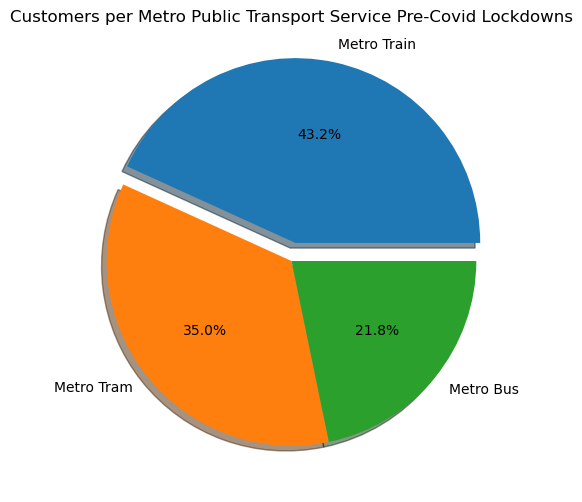

In [9]:
# Plot pie chart 1
plt.figure(figsize=(6,6))
plt.pie(pre_covid, labels=labels, autopct="%1.1f%%",explode=explode,shadow = True)
plt.title("Customers per Metro Public Transport Service Pre-Covid Lockdowns")

# Save and show the visualisation
plt.savefig("../Visualisations/Q2-2.1.jpg")
plt.show()

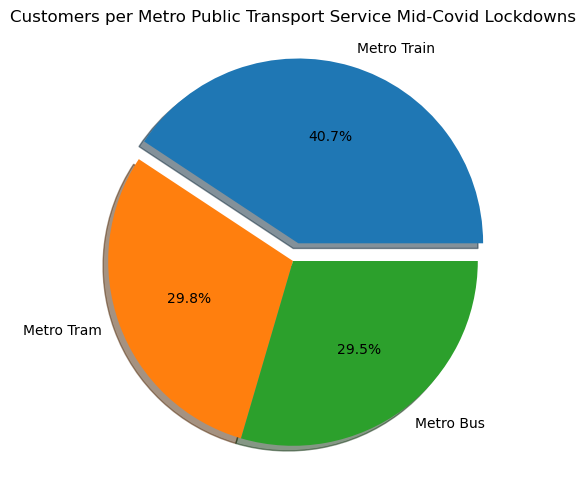

In [10]:
# Plot pie chart 2
plt.figure(figsize=(6,6))
plt.pie(mid_covid, labels=labels, autopct="%1.1f%%",explode=explode,shadow = True)
plt.title("Customers per Metro Public Transport Service Mid-Covid Lockdowns")

# Save and show the visualisation
plt.savefig("../Visualisations/Q2-2.2.jpg")
plt.show()

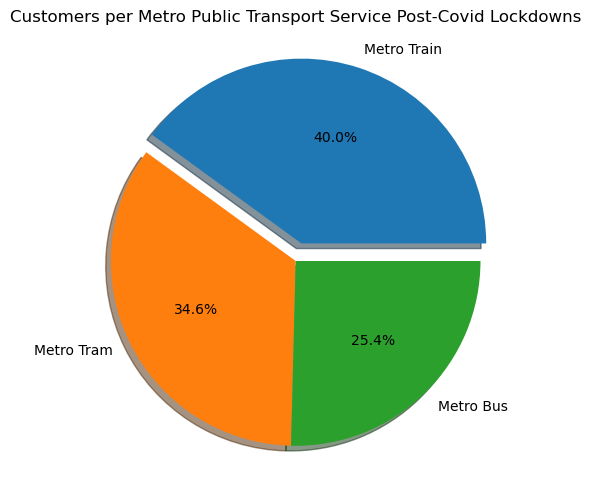

In [11]:
# Plot pie chart 3
plt.figure(figsize=(6,6))
plt.pie(post_covid, labels=labels, autopct="%1.1f%%",explode=explode,shadow = True)
plt.title("Customers per Metro Public Transport Service Post-Covid Lockdowns")

# Save and show the visualisation
plt.savefig("../Visualisations/Q2-2.3.jpg")
plt.show()

**Null Hypothesis**: The rise in Victorian COVID cases had no impact on public transport usage across the 3 modes of public transport (Train, Tram and Bus) across Metropolitan Victoria.

**Alternate Hypothesis**: The rise in Victorian COVID cases caused a decrease in public transport usage across the 3 modes of public transport (Train, Tram and Bus) across Metropolitan Victoria.

In [12]:
# Datasets to be assessed
mtrain = monthly_pt_df["Metropolitan train"]
mtram = monthly_pt_df["Metropolitan tram"]
mbus = monthly_pt_df["Metropolitan bus"]
new_cases = covid_cases_df["New Covid Cases"]

The mean customers per month of trains in Metropolitan Melbourne is: 12882080.94
The standard deviation of customers per month of trains in Metropolitan Melbourne is: 7101509.87


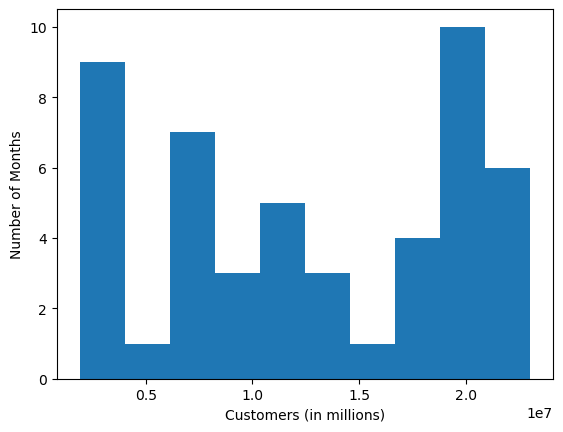

NormaltestResult(statistic=35.40612800915177, pvalue=2.049542790756651e-08)


In [13]:
# Working out mean and standard deviation, then plotting a histogram and calculating if the data is normal
print(f"The mean customers per month of trains in Metropolitan Melbourne is: {round(mtrain.mean(),2)}")
print(f"The standard deviation of customers per month of trains in Metropolitan Melbourne is: {round(mtrain.std(),2)}")
plt.hist(mtrain)
plt.xlabel("Customers (in millions)")
plt.ylabel("Number of Months")
plt.show()
print(st.normaltest(mtrain))

The mean customers per month of trams in Metropolitan Melbourne is: 10331889.63
The standard deviation of customers per month of trams in Metropolitan Melbourne is: 5955960.54


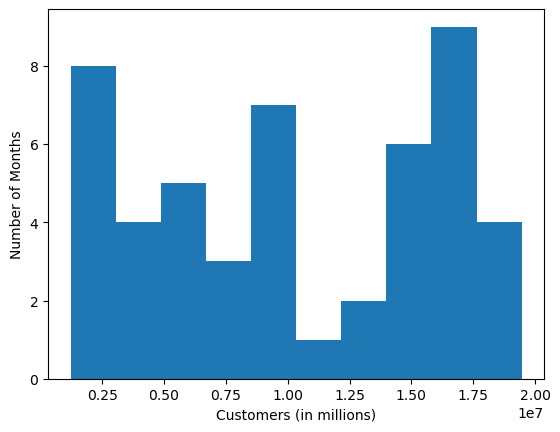

NormaltestResult(statistic=33.97778327177461, pvalue=4.186182028154313e-08)


In [14]:
# Working out mean and standard deviation, then plotting a histogram and calculating if the data is normal
print(f"The mean customers per month of trams in Metropolitan Melbourne is: {round(mtram.mean(),2)}")
print(f"The standard deviation of customers per month of trams in Metropolitan Melbourne is: {round(mtram.std(),2)}")
plt.hist(mtram)
plt.xlabel("Customers (in millions)")
plt.ylabel("Number of Months")
plt.show()
print(st.normaltest(mtram))

The mean customers per month of bus in Metropolitan Melbourne is: 7229171.16
The standard deviation of customers per month of bus in Metropolitan Melbourne is: 3061172.67


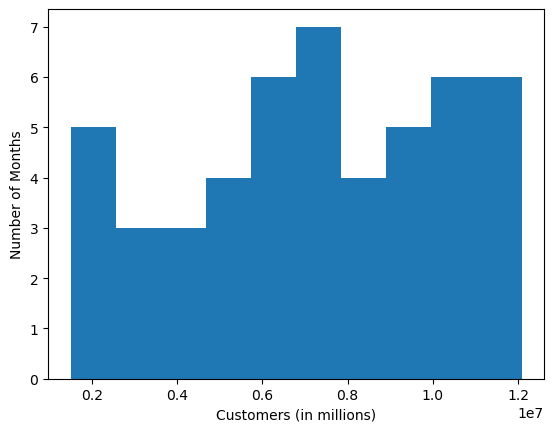

NormaltestResult(statistic=7.774019242920743, pvalue=0.02050657686801588)


In [15]:
# Working out mean and standard deviation, then plotting a histogram and calculating if the data is normal
print(f"The mean customers per month of bus in Metropolitan Melbourne is: {round(mbus.mean(),2)}")
print(f"The standard deviation of customers per month of bus in Metropolitan Melbourne is: {round(mbus.std(),2)}")
plt.hist(mbus)
plt.xlabel("Customers (in millions)")
plt.ylabel("Number of Months")
plt.show()
print(st.normaltest(mbus))

The mean cases per day of Covid in Victoria is: 2733.07
The standard deviation of cases per day of Covid in Victoria is: 5680.06


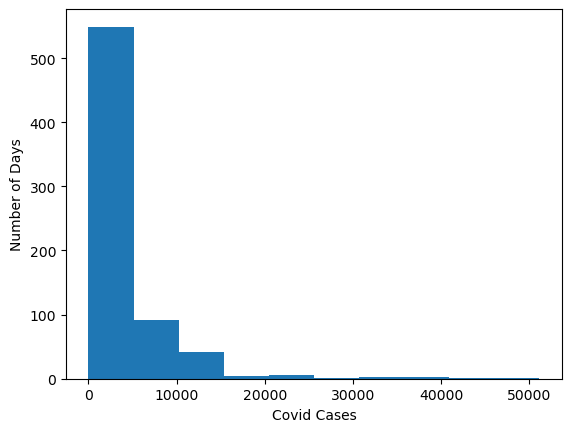

NormaltestResult(statistic=565.5317878310013, pvalue=1.571565918753729e-123)


In [16]:
# Working out mean and standard deviation, then plotting a histogram and calculating if the data is normal
print(f"The mean cases per day of Covid in Victoria is: {round(new_cases.mean(),2)}")
print(f"The standard deviation of cases per day of Covid in Victoria is: {round(new_cases.std(),2)}")
plt.hist(new_cases)
plt.xlabel("Covid Cases")
plt.ylabel("Number of Days")
plt.show()
print(st.normaltest(new_cases))

In [17]:
# Independent T-Test comparing metro trains & new covid cases
print("Metropolitan Train usage vs. New Covid Cases:")
st.ttest_ind(mtrain, new_cases, equal_var = False)

Metropolitan Train usage vs. New Covid Cases:


Ttest_indResult(statistic=12.695248564231601, pvalue=5.901344634811034e-17)

In [18]:
# Independent T-Test comparing metro trams & new covid cases
print("Metropolitan Tram usage vs. New Covid Cases:")
st.ttest_ind(mtram, new_cases, equal_var = False)

Metropolitan Tram usage vs. New Covid Cases:


Ttest_indResult(statistic=12.139787219106497, pvalue=3.065189870223971e-16)

In [19]:
# Independent T-Test comparing metro bus & new covid cases
print("Metropolitan Bus usage vs. New Covid Cases:")
st.ttest_ind(mbus, new_cases, equal_var = False)

Metropolitan Bus usage vs. New Covid Cases:


Ttest_indResult(statistic=16.52473283517618, pvalue=1.9239845535989087e-21)